# Support Vector Machine

SEOYEON CHOI  
2023-03-25

> Support Vector Machine

-   Support Vector Machine은 모델이다.
-   hyperparameter는 C와 gamma
-   주로 사용하는 손실함수는 힌지손실 Hinge Loss

Reference : [핸즈 온
머신러닝](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/),
[머신러닝 도감](https://jpub.tistory.com/992), [사이킷런
홈페이지](https://scikit-learn.org/stable/modules/svm.html)

[마진이 아래 식으로 구해지는
이유](https://math.stackexchange.com/questions/1305925/why-is-the-svm-margin-equal-to-frac2-mathbfw)

-   margin = $\frac{2}{||w||}$

[어딘가의 SVM lecture
노트임!](https://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf)

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/450px-SVM_margin.png)

-   샘플들을 서포트벡터라고 보자
-   마진은 $\frac{2}{||w||}$
-   점 하나가 랜드마크. 랜드마크를 어떤 기준으로 뽑을 것임.
-   그 기준으로 슬랙 변수를 계산할건데

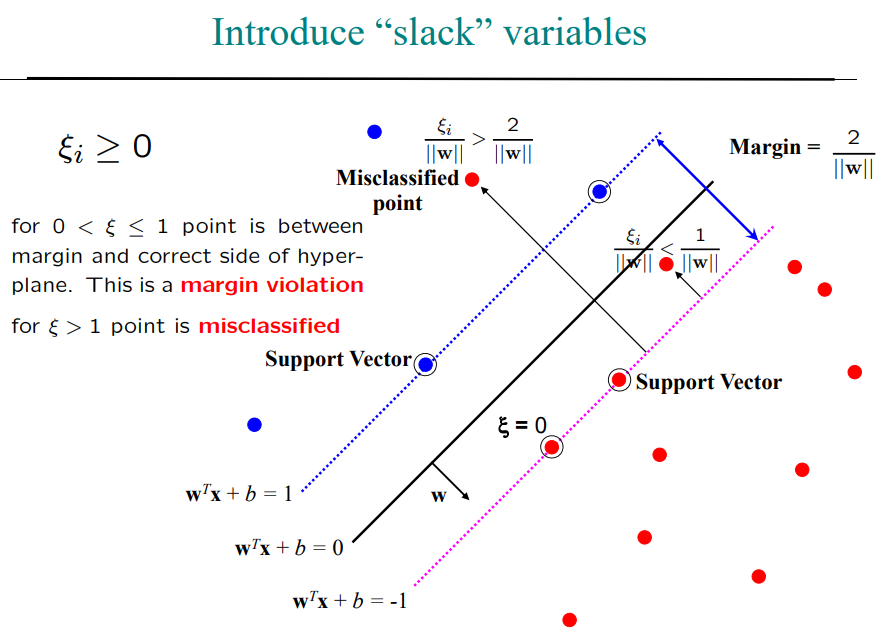

-   위의 경우는 소프트 마진에 한 함
-   마진 경계선으로부터 반대쪽까지 거리를 슬랙 변수로 정의함
-   경계에 걸치면 슬랙변수는 0이 됌.
-   0과 1사이에 있으면 마진 오차 margin violation
-   2보다 크다면 잘못 분류됨 misclassified
-   소프트 마진에서는 1이나 -1이 아니라 $1- \zeta_1$을 기준으로 경계선이
    나눠져서!
-   소프트 마진에서는 하이퍼파라미터 C를 거의 0으로 만들어서 하드
    마진처럼 strick 하게 만들 수 있음

**힌지 손실 Hinge Loss**

-   $max(0,1-t)$ function
-   $t=1$에서 미분가능하지 않지만 $t=1$에서 서브그레디언트로 경사 하강법
    사용

# 1. 선형 SVM 분류

-   클래스가 선형으로 분류될 때
-   클래스 분류의 경계에 있는 샘플 = 서포트 벡터

## 1) 하드 마진 분류

-   클래스 분류의 경계에 샘플이 없을 때 = 마진 오류가 하나도 없을때,
    하드 마진 분류

    -   선형적으로 구분되어야 함
    -   이상치에 민감함

이 때 생기는 이상치를 마진 오류로 본다.

-   이상치 $\to$ 클래스 구분했을때 그어지는 선에 걸쳐지는 값들 $\to$
    마진 오류 margin violation

적절한 균형 잡는 것이 필요

$minimize_{w,b} ||w||^2_2$

subject to $y_i(w^\top x_i - b) \ge 1 \forall_i \in \{1, \dots , n \}$

-   거의 불가능..한 자료 구조..

## 2) 소프트 마진 분류

소프트 마진 분류 필요한 이유.

-   hyper parameter C가 너무 크면 과대적합 가능성 존재

손실함수는 [힌지 손실 Hinge
Loss](https://en.wikipedia.org/wiki/Hinge_loss)

-   주로 SVM과 함께 쓰임. $max(0,1-y), max(0,1+y)$ 로 $y$의 범위가
    \[-1,1\]에 오도록 함

$minimize_{w,b,\zeta} ||w||^2_2 + C\sum^n_{i=1} \zeta_i$

subject to
$y_i(w^\top x_i - b) \ge 1-\zeta_i, \zeta_i \ge 0 \forall_i \in \{ 1 ,\dots, n\}$

-   $1-\zeta_i$로 잡음으로써 더 유연하게 이상치 정의 및 경계선 정의

-   위처럼 선에 걸친게 마진 오류 margin violation

# 2. 비선형 SVM 분류

-   선형적으로 분류할 수 없는 데이터셋에 한해서, 2차, 3차,.. 등

## 1) 다항식 커널

-   다항식은 잘 작동하기는 한데 설명변수가 너무 많아지면 오히려 모델을
    느리게 만들어서 안 좋아..

## 2) 유사도 특성

-   특정 랜드마크와 얼마나 닮았는지 유사도 함수 similarity function =
    similarity measure = similarity metric 로 계산[1]
    -   특정 랜드마크 -\> 데이터 분포가 있을떄 뽑아진 임의의 점?

[유사도 함수의 종류](https://en.wikipedia.org/wiki/Similarity_measure)

-   유클리디안 거리 Euclidean Distance ; 모든 속성 고려
-   [코사인 유사도 Cosine
    Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) ;
    각으로 고려; -1~1사이
-   마할라라비스 거리 ; 값들 사이의 공분산 이용
-   민코스키 거리 Minkowski Distance ; 가장 큰 값만 고려

## 3) 가우시안 RBF 커널[2]

-   [Gaussian Radical Basis Function = Gaussian
    Kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)

## 4) 계산 복잡도

$O(m\times n)$

computational complexity theory

# 3. SVM 회귀

SVM은 선형, 비선형 분류 뿐만 아니라 선형, 비선형 회귀에도 사용

-   마진을 크게하든지(오른쪽) 작게하든지(왼쪽) 영향을 받지 않는다면,
    민감하지 않다고 표현

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToqCwuryPQlMv-e3VZElBUqIHrJozxH0j19w&usqp=CAU.png)

# 4. SVM 이론

## 1) 결정 함수와 예측

**선형 SVM을 훈련한다 = 마진 오류를 하나도 발생하지 않거나(하드 마진)
제한적인 마진 오류를 가지면서(소프트 마진) 가능한 한 마진을 크게 하는
$\mathbb{w}$와 $b$를 찾는 것**

단순히 선형 회귀식 계산해서 0인지 1인지를 나눈다.

$\hat{y} = \begin{cases} 0 & \mathbb{w}^\top \mathbb{x} + b < 0 \text{ 일 때} \\ 1 & \mathbb{w}^\top \mathbb{x} + b \ge 0 \text{ 일 때} \end{cases}$

## 2) 목적 함수

결정 함수의 기울기는 가중치 벡터의 노름 $||w||$와 같다.

-   마진 크게 = $||w||$ 최소화

하드 마진 선형 SVM 분류기의 목적 함수

$minimize_{w,b} \frac{1}{2} \mathbb{w^\top w}$

$\star$ 왜 $\frac{1}{2} \mathbb{w^\top w}$? $||w||$는 $w=0$에서 미분도
되지 않음

소프트 마진 선형 SVM 분류기의 목적 함수

-   슬랙 변수 slack variable $\zeta^{(i)} \ge 0$ 도입
    -   i번째 샘플이 얼마나 마진을 위반할지 정함
    -   $x > b$
    -   $x = b + slack$

-\> 슬랙변수는 경계를 나눌때 생기는 최소한의 오차로 생각하자

마진 오류 최소화 방법

1.  슬랙 변수 값을 작게 만들기
2.  마진 크게 하기 위해 $\frac{1}{2} \mathbb{w^\top w}$ 최소화

$minimize_{w,b,\zeta} \frac{1}{2} \mathbb{w^\top w} + C \sum^m_{i=1}\zeta^{(i)}$

$\star$ hyper parameter $C$ $\to$ 두 목표object 사이의 트레이드 오프
정의

## 3) 콰드라틱 프로그래밍

콰드라틱 프로그래밍 Quadratic Programming, QP = 하드 마진과 소프트 마진
문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제

## 4) 쌍대 문제

## 5) 커널 SVM

원래 선형 분리할 수 없는 비선형 데이터를 커널을 통해서 선형화 시킴!

$\star$ 가우시안 커널이 복잡한 결정 경게를 학습한다고 데이터에 무조건
비선형 커널 기법을 적용하지 말고(분석에 의미가 없을 수 있음), 선형
커널을 이용한 분석으로 확린 후 커널 함수를 적용한 분석을 하는 것이 좋음

![image](https://miro.medium.com/v2/resize:fit:838/1*gXvhD4IomaC9Jb37tzDUVg.png)

커널의 종류

-   선형 커널 linear kernel [예시, 선형, 비선형
    포함](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)
    -   $<x,x'>$
-   시그모이드 커널 sigmoid kernel
    -   $\tanh(\gamma<x,x'>+r)$
    -   where $r$ is specified by `coef0`.
-   다항 커널 polynomial kernel
    -   $(\gamma<x,x'> + r)^d$
    -   where $d$ is specified by parameter `degree`, $r$ by `coef0`.
-   RBF 커널 = 가우시안 커널 rbf kernel
    -   $exp(-\gamma||x - x'||^2)$
    -   where $r$ is specified by parameter `gamma`, must be grater than
        0
        -   복잡한 결정 경계 다룰때 좋을 듯

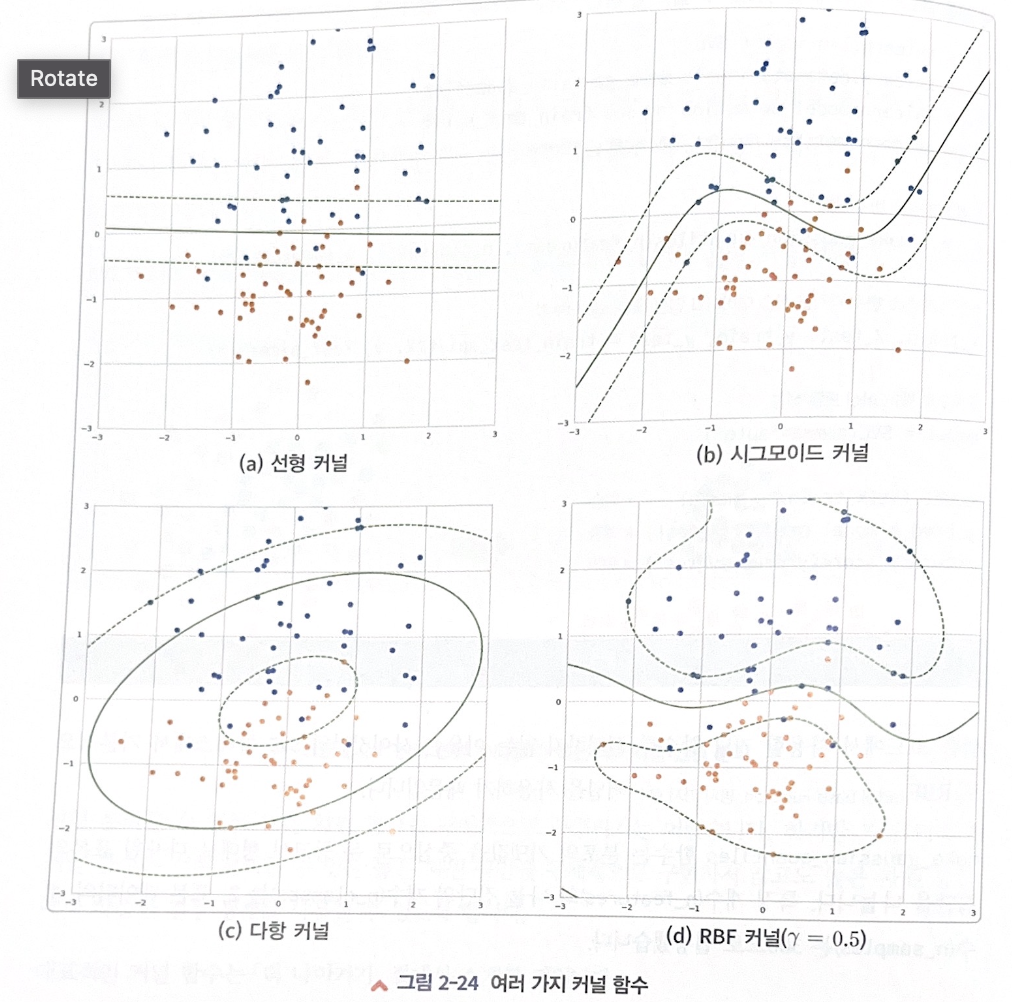

쓰는 법

``` python
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel
```

선형 커널

``` python
linear_svc = svm.SVC(kernel='sigmoid')
linear_svc.kernel
```

시그모이드 커널

``` python
linear_svc = svm.SVC(kernel='poly')
linear_svc.kernel
```

다항 커널

``` python
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel
```

rbf 커널

## 6) 온라인 SVM

# SVM과 로지스틱 회귀의 차이

> 둘 다 지도학습이다!

-   SVM은 경계면으로 데이터 classification, 로지스틱은 시그모이드
    함수로0~1 사이 확률값 추정해서 분류
-   대용량 데이터에서는 SVM이 적당, 로지스틱 회귀는 느리다
-   multi-class를 위해 로지스틱 회귀 이용, SVM은 이진 분류만 가능
-   슬랙변수 쓰는 SVM은 이상치에 덜 민감함, 하지만 로지스틱은 이런 역할
    하는 변수 없어서 민감

# 예제

SVM

[1] a real-valued function that quantifies the similarity between two
objects

[2] 커널svm 참고

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분류의 중심 위치 정의
centers = [(-1, -0.125), (0.5, 0.5)]

# 특징과 종속 변수 생성
X, y = make_blobs(n_samples=50, n_features=2, centers=centers, cluster_std=0.3)

# 특징과 종속 변수 각각을 학습 데이터와 검증 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 선형 서포트 벡터 머신 모델 생성
model = LinearSVC()

model.fit(X_train, y_train)    # 학습
y_pred = model.predict(X_test) # 예측
accuracy_score(y_pred, y_test) # 평가

커널 기법 이용

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 특징과 종속 변수 생성
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)

# 특징과 종속 변수 각각을 학습 데이터와 검증 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 서포트 벡터 머신 모델 생성
model = SVC(gamma='auto')

model.fit(X_train, y_train)    # 학습
y_pred = model.predict(X_test) # 예측
accuracy_score(y_pred, y_test) # 평가